# Importing nessary packages and loading the dataset 





In [1]:
# import needed in the beginning 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# inmport needed later on in the project 
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# this will filter warnings if they pop up 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# read and print the data 
metadata = pd.read_csv("creditcard.csv")
metadata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploring the dataset

In [3]:
# getting an idea of how many are real cases vs fradulent cases 

# real cases == 0
print('Non Fraudulent transactions:', len(metadata[metadata.Class == 0]))

# fraud cases == 1
print('Fraudulent transactions:', len(metadata[metadata.Class == 1]))

# percentage of real / fraud
print("Percentage of fraudulent transactions", len(metadata[metadata.Class == 1])/len(metadata))

Non Fraudulent transactions: 284315
Fraudulent transactions: 492
Percentage of fraudulent transactions 0.001727485630620034


As we can see from the data above, there is a huge imbalance between the two different kinds of transactions and this will be addressed in preproccessing

In [4]:
# checking for any null values 
print (metadata.isnull().sum().max())

0


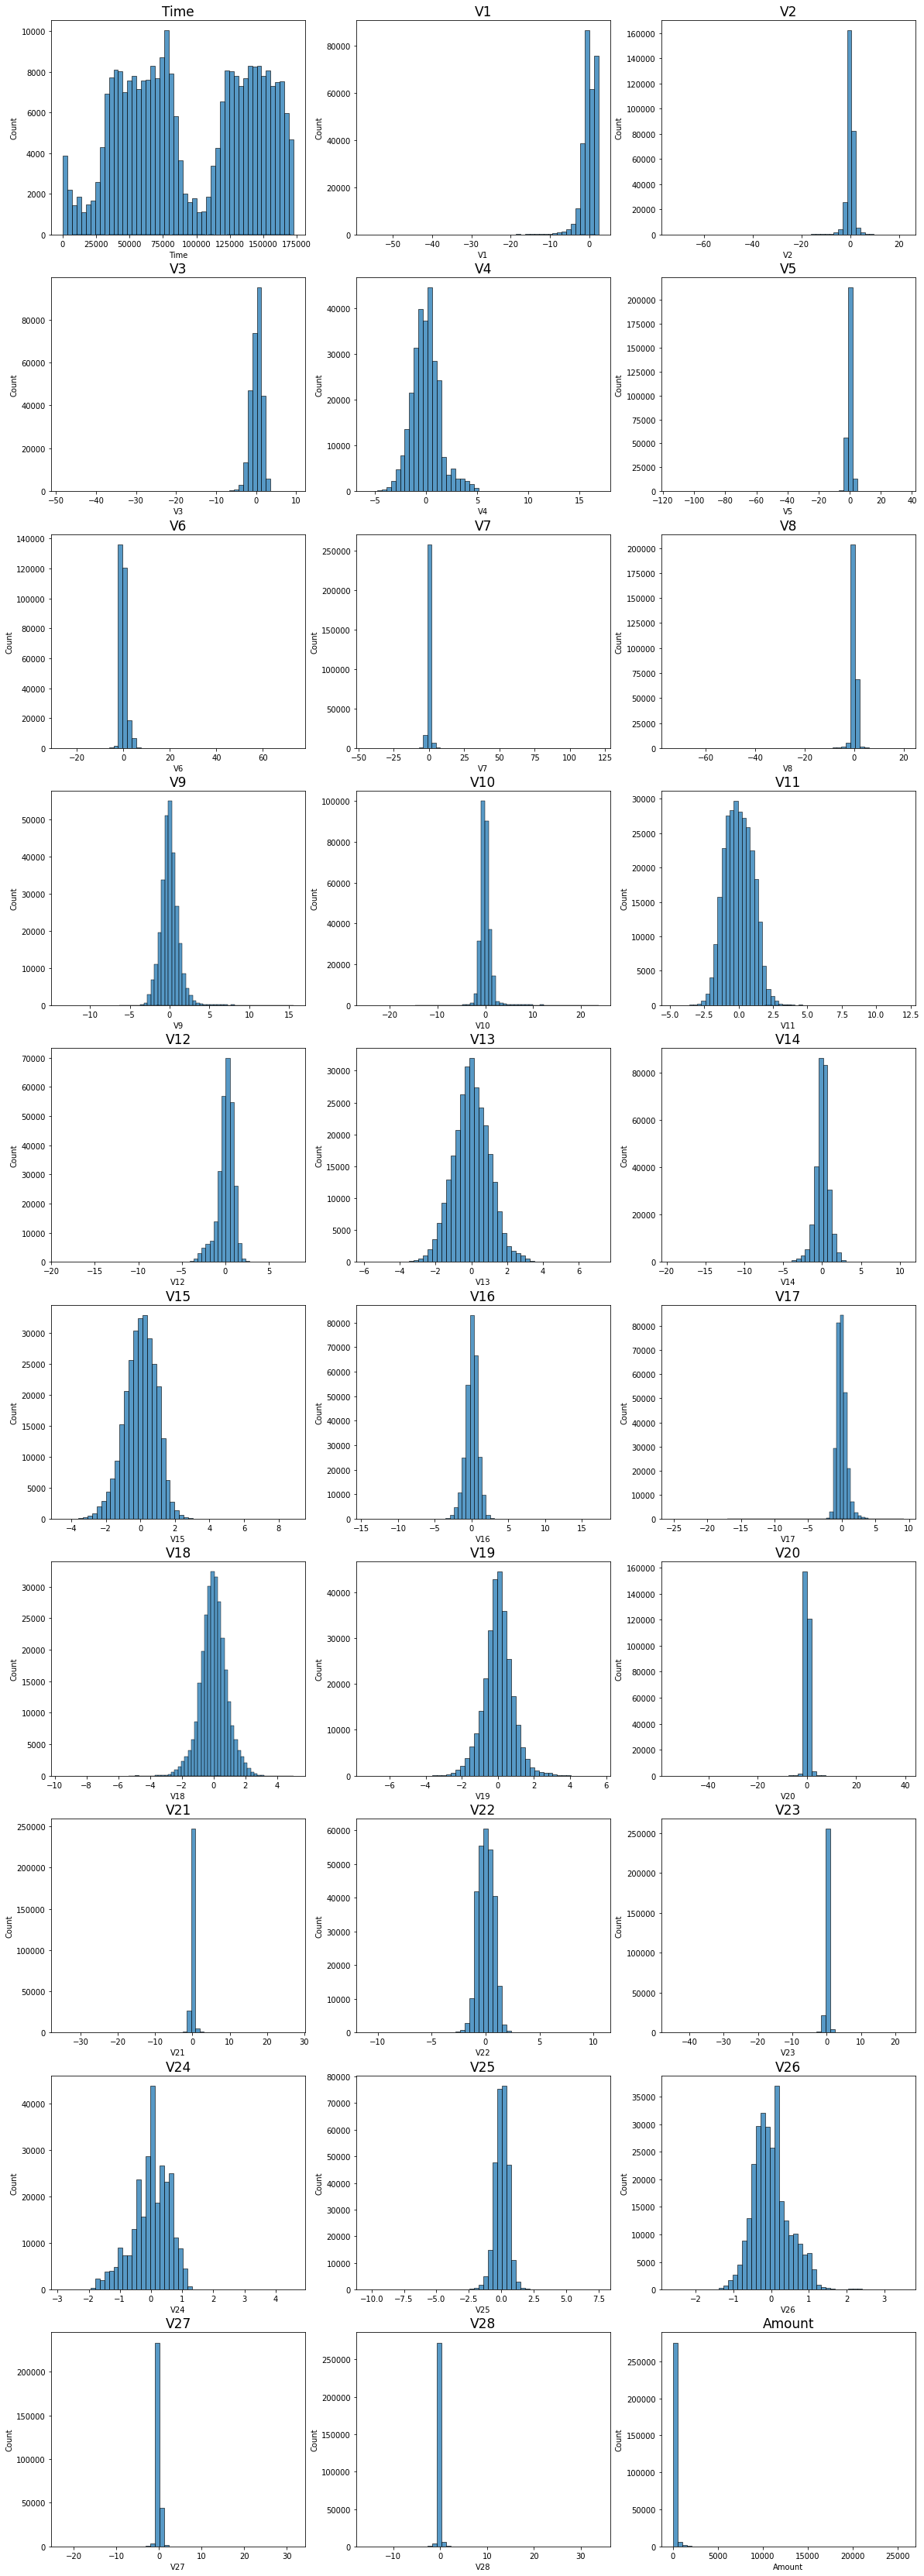

In [5]:
# histogram of the fraud cases and regular cases 
fraud_cases = metadata[metadata['Class'] == 1]
regular_cases = metadata[metadata['Class'] == 0]

# setting figure size
plt.figure(figsize = (20, 60))

# for loop to plot data and this is easier way to plot rather than 
# doing it individually 
for n, col in enumerate(metadata.drop('Class', axis = 1).columns):
    plt.subplot(10, 3, n + 1)
    sns.histplot(metadata[col][metadata.Class == 1], bins = 50)
    sns.histplot(metadata[col][metadata.Class == 0], bins = 50)
    plt.title(col, fontsize=17)
plt.show()

# Preprocessing the data

In [6]:
# printing the imbalance
metadata['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

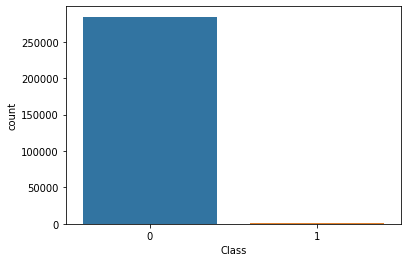

In [7]:
# printing imbalance on bar graph
sns.countplot(metadata.iloc[:, -1])

In [8]:
# https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
# code was taken from this website for resampling 

from sklearn.utils import resample
# upsample minority class
metadata_fraud_unsampled = resample(fraud_cases, 
                                 replace = True,    # sample with replacement
                                 n_samples = 284315, # to match majority class
                                 random_state = 42)  # reproducible results
# Combine majority class with upsampled minority class
metadata_upsampled = pd.concat([metadata_fraud_unsampled, regular_cases])

1    284315
0    284315
Name: Class, dtype: int64


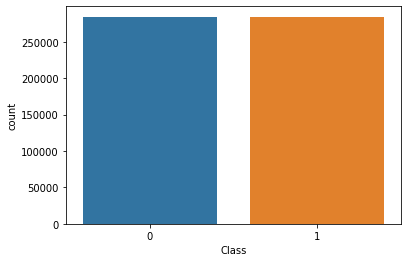

In [9]:
print(metadata_upsampled['Class'].value_counts())
sns.countplot(metadata_upsampled['Class'])

In [10]:
# dropping two columns and assigning y variable
X = metadata_upsampled.drop(['Time', 'Class'], axis=1)
y = metadata_upsampled['Class']

print(X.shape)
print(y.shape)

(568630, 29)
(568630,)


# Splitting data 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Models

###Logistic Regression Model

In [13]:
# Logistic regression model 
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 42, max_iter = 500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [14]:
model1_pred = log_reg.predict(X_test)

In [15]:
print("Accuracy Score: ", (accuracy_score(y_test, model1_pred)))
print("Precision Score: ", (precision_score(y_test, model1_pred)))
print("Recall Score: ", (recall_score(y_test, model1_pred)))
print("F1 Score: ", (f1_score(y_test, model1_pred)))

Accuracy Score:  0.9494750540773438
Precision Score:  0.9762020337801676
Recall Score:  0.9212220160210481
F1 Score:  0.9479154706582629


###Random Forest Classifier

In [16]:
forest = RandomForestClassifier()

In [17]:
forest_model = forest.fit(X_train,y_train)

In [18]:
forest_pred = forest_model.predict(X_test)

In [19]:
print("Accuracy Score: ", (accuracy_score(y_test, forest_pred)))
print("Precision Score: ", (precision_score(y_test, forest_pred)))
print("Recall Score: ", (recall_score(y_test, forest_pred)))
print("F1 Score: ", (f1_score(y_test, forest_pred)))

Accuracy Score:  0.999970689786563
Precision Score:  0.9999412752663167
Recall Score:  1.0
F1 Score:  0.9999706367709845


### Decision Tree Model

In [20]:
decision_tree = DecisionTreeRegressor()

In [21]:
tree_model = decision_tree.fit(X_train,y_train)

In [22]:
final_prediction = tree_model.predict(X_test)

In [23]:
print("Accuracy Score: ", (accuracy_score(y_test, final_prediction)))
print("Precision Score: ", (precision_score(y_test, final_prediction)))
print("Recall Score: ", (recall_score(y_test, final_prediction)))
print("F1 Score: ", (f1_score(y_test, final_prediction)))

Accuracy Score:  0.999777242377879
Precision Score:  0.9995538649384803
Recall Score:  1.0
F1 Score:  0.9997768826990148
